<a href="https://colab.research.google.com/github/raja-khalil/Python-training/blob/main/calculo_metricas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Matriz de Confusão:
 [[259 231]
 [267 243]]
Acurácia: 0.50
Sensibilidade (Recall): 0.49
Especificidade: 0.51
Precisão: 0.53
F-score: 0.51


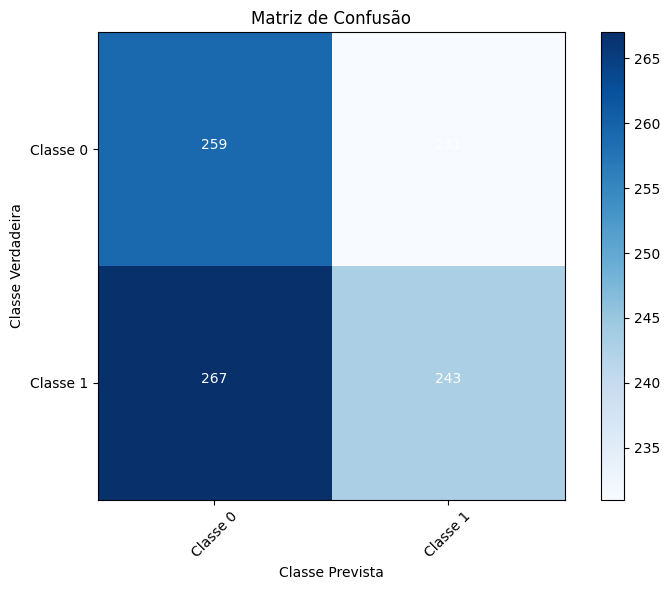

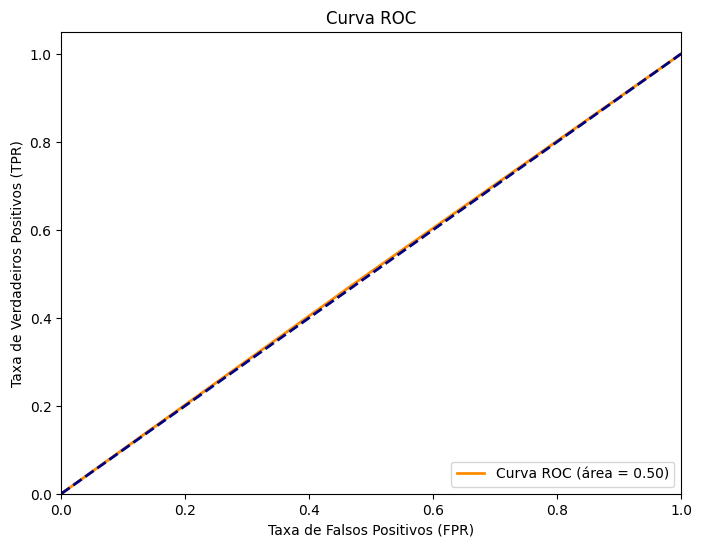

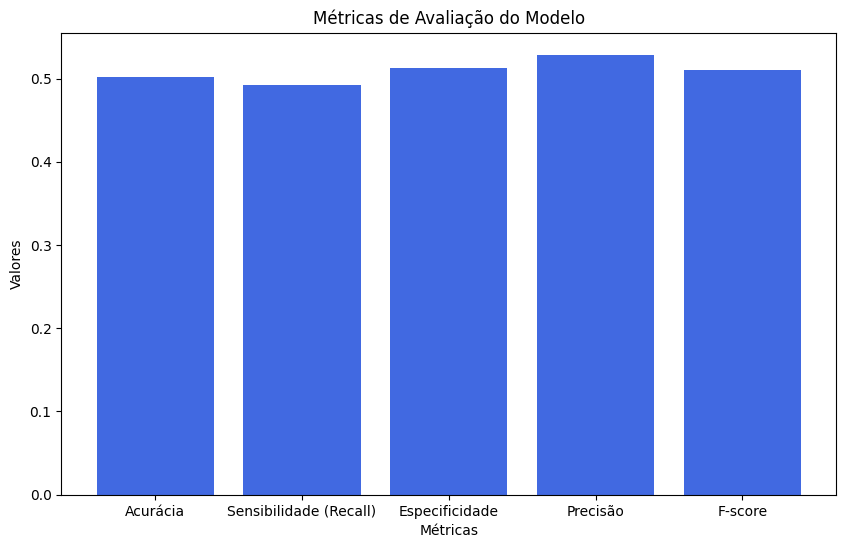

In [7]:
# Importação das bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Função para gerar dados fictícios
def gerar_dados_ficticios(n_samples=1000):
    """
    Gera dados fictícios para um problema de classificação binária.
    :param n_samples: int - Número de amostras a serem geradas.
    :return: tuple - Dados reais e previstos.
    """
    np.random.seed(42)
    y_true = np.random.randint(0, 2, n_samples)
    y_pred = np.random.randint(0, 2, n_samples)
    return y_true, y_pred

# Função para calcular métricas a partir da matriz de confusão
def calcular_metricas(matriz_de_confusao):
    """
    Calcula as métricas de avaliação de um modelo de classificação.
    :param matriz_de_confusao: np.array - Matriz de confusão.
    :return: dict - Dicionário com as métricas calculadas.
    """
    VP, FP, FN, VN = matriz_de_confusao.flatten()

    # Cálculo das métricas
    acuracia = (VP + VN) / (VP + FP + FN + VN)
    sensibilidade = VP / (VP + FN)
    especificidade = VN / (VN + FP)
    precisao = VP / (VP + FP)
    f_score = 2 * (precisao * sensibilidade) / (precisao + sensibilidade)

    # Retorno das métricas em um dicionário
    metricas = {
        "Acurácia": acuracia,
        "Sensibilidade (Recall)": sensibilidade,
        "Especificidade": especificidade,
        "Precisão": precisao,
        "F-score": f_score
    }

    return metricas

# Função para plotar a matriz de confusão
def plotar_matriz_confusao(matriz_de_confusao):
    """
    Plota a matriz de confusão.
    :param matriz_de_confusao: np.array - Matriz de confusão.
    """
    plt.figure(figsize=(8, 6))
    plt.imshow(matriz_de_confusao, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Matriz de Confusão')
    plt.colorbar()
    classes = ['Classe 0', 'Classe 1']
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = matriz_de_confusao.max() / 2
    for i, j in np.ndindex(matriz_de_confusao.shape):
        plt.text(j, i, format(matriz_de_confusao[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if matriz_de_confusao[i, j] > thresh else "black")

    plt.ylabel('Classe Verdadeira')
    plt.xlabel('Classe Prevista')
    plt.tight_layout()
    plt.show()

# Função para plotar a curva ROC
def plotar_curva_roc(y_true, y_pred):
    """
    Plota a curva ROC e calcula a AUC.
    :param y_true: np.array - Valores reais.
    :param y_pred: np.array - Valores previstos.
    """
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (área = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Taxa de Falsos Positivos (FPR)')
    plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
    plt.title('Curva ROC')
    plt.legend(loc="lower right")
    plt.show()

# Função para plotar métricas em gráfico de barras
def plotar_metricas(metricas):
    """
    Plota as métricas de avaliação em gráfico de barras.
    :param metricas: dict - Dicionário com as métricas calculadas.
    """
    nomes_metricas = list(metricas.keys())
    valores_metricas = list(metricas.values())

    plt.figure(figsize=(10, 6))
    plt.bar(nomes_metricas, valores_metricas, color='royalblue')
    plt.xlabel('Métricas')
    plt.ylabel('Valores')
    plt.title('Métricas de Avaliação do Modelo')
    plt.show()

# Função principal para rodar o módulo de cálculo de métricas
def main():
    """
    Função principal para rodar o módulo de cálculo de métricas.
    """
    # Gerar dados fictícios
    y_true, y_pred = gerar_dados_ficticios()

    # Gerar matriz de confusão
    matriz_de_confusao = confusion_matrix(y_true, y_pred)

    # Calcular métricas
    metricas = calcular_metricas(matriz_de_confusao)

    # Exibir matriz de confusão
    print("Matriz de Confusão:\n", matriz_de_confusao)

    # Exibir métricas calculadas
    for metrica, valor in metricas.items():
        print(f"{metrica}: {valor:.2f}")

    # Plotar matriz de confusão
    plotar_matriz_confusao(matriz_de_confusao)

    # Plotar curva ROC
    plotar_curva_roc(y_true, y_pred)

    # Plotar métricas em gráfico de barras
    plotar_metricas(metricas)

# Executar a função principal
if __name__ == "__main__":
    main()


